# Quality Time

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from etl import DATADIR, ErgastF1
from viz import Plot

f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

Autosave disabled


## lights out
Qualifying times as % of best time.

In [2]:
qtimes = (
    f1.qualifying
    .join(f1.drivers['driver'], on='id_driver')
    .join(f1.races['date id_circuit season'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .assign(seconds = lambda df: df['q1 q2 q3'.split()].min(axis=1))
    .sort_values('date circuit pos'.split())
    ['season circuit driver seconds'.split()]
)
qtimes

,season,circuit,driver,seconds
2594,1994,Autódromo José Carlos Pace,Ayrton Senna,75.962
2595,1994,Autódromo José Carlos Pace,Michael Schumacher,76.290
2596,1994,Autódromo José Carlos Pace,Jean Alesi,77.385
2597,1994,Autódromo José Carlos Pace,Damon Hill,77.554
2598,1994,Autódromo José Carlos Pace,Heinz-Harald Frentzen,77.806
...,...,...,...,...
8373,2019,Yas Marina Circuit,Romain Grosjean,98.051
8374,2019,Yas Marina Circuit,Antonio Giovinazzi,98.114
8375,2019,Yas Marina Circuit,Kimi Räikkönen,98.383
8376,2019,Yas Marina Circuit,George Russell,98.717


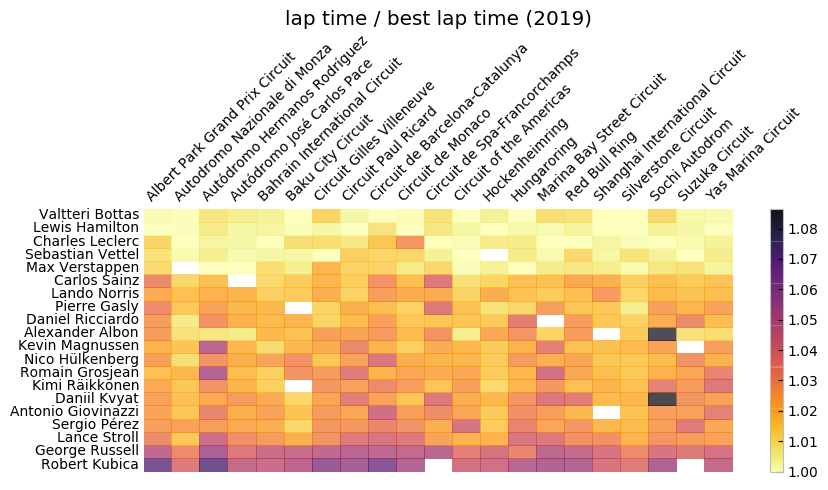

In [3]:
def hotlaps(data, season, **kwargs):

    data = data[data['season'].eq(season)]
    data = data.pivot(index='driver', columns='circuit', values='seconds')
    data = data.div(data.min(axis=0), axis=1).clip(upper=1.2)
    data = data.loc[data.median(axis=1).sort_values().index]
        
    kwset = kwargs.setdefault
    kwset('cmap', 'inferno_r')
    kwset('title', f"lap time / best lap time ({season})")
    plot.heat(data, **kwargs)
    
hotlaps(qtimes, 2019)

## away we go
First lap time as % of best first lap time.

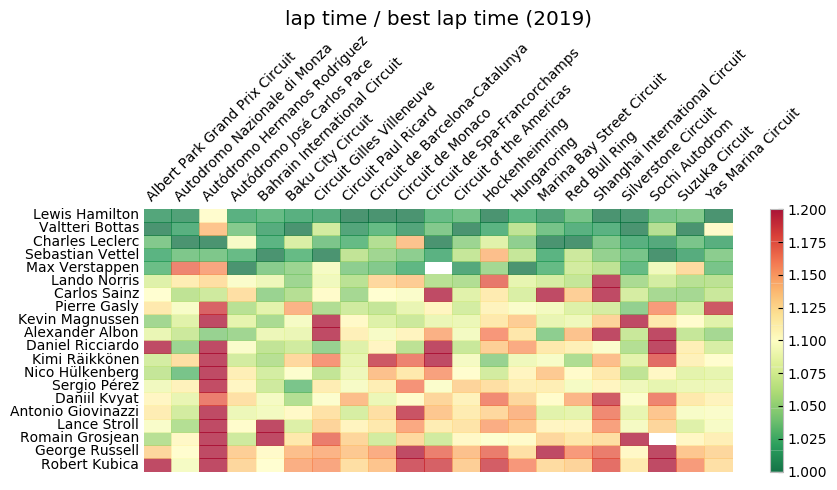

In [4]:
starts = (
    f1.lap_times[lambda df: df['lap'].eq(1)]
    .join(f1.drivers['driver'], on='id_driver')
    .join(f1.races['date id_circuit season'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .sort_values('date circuit pos'.split())
    ['season circuit driver pos seconds'.split()]
)
hotlaps(starts, 2019, cmap='RdYlGn_r')

## over the line
Worst violations of 107% rule.

In [5]:
data = qtimes.set_index('season circuit driver'.split())['seconds']
data /= data.groupby(level=[0,1]).min()
data.name = 'qfactor'
data.nlargest(20).reset_index()

,season,circuit,driver,qfactor
0,1995,Suzuka Circuit,Mark Blundell,10.228620
1,2016,Hungaroring,Rio Haryanto,1.377965
2,2016,Hungaroring,Pascal Wehrlein,1.342375
3,2016,Hungaroring,Marcus Ericsson,1.337885
4,2005,Albert Park Grand Prix Circuit,Michael Schumacher,1.335890
5,2004,Autodromo Enzo e Dino Ferrari,Zsolt Baumgartner,1.332853
6,2010,Circuit de Spa-Francorchamps,Lucas di Grassi,1.311747
7,2016,Hungaroring,Kevin Magnussen,1.307359
8,2016,Hungaroring,Felipe Massa,1.300556
9,2016,Hungaroring,Jolyon Palmer,1.300131
